# Part I - Ford GoBike System Data Exploration
## by _Mlungiseleli Notshokovu_

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

- Note that this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
from urllib.request import urlopen
import shutil
import os
import io
import datetime
import requests
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
#Using requests to extract the data and creating a dataframe
url = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
csv_data = requests.get(url).content
bike_df = pd.read_csv(io.StringIO(csv_data.decode('utf-8')))

In [3]:
# high-level overview of data shape and composition
print(bike_df.shape)
print(bike_df.dtypes)
#print(bike_df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
bike_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
bike_df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### What is the structure of your dataset?

- The dataset has 183412 data entries/rows and 16 columns
- The variables: 'start_station_name', 'end_station_name', 'user_type', and 'member_gender' are qualitative nominal variables

### What is/are the main feature(s) of interest in your dataset?

- The main features of interest for me are: birth_year/age, user type,time, gender, start and end station
    - Whether the user's age has any effect on time?
    - Whether there is a gender gap? 
    - Which gender is more popular?
    - Amount of time spent and the distance covered?
    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. The type of station and how close it is to the city will tell me if it has more trips than outer city stations.
2. The time of day will determine when bikes are used the most: busy or quiet times
3. The type of user: Subscriber/Customer with the most rides

## Data Cleaning

## Issue #1

### Define:
- convert the duration from seconds to minutes by dividing with 60
- create a column duration_mins 

### Code

In [5]:
#Creating a minutes column and round off the results to 2 decimals
bike_df['duration_mins'] = (bike_df['duration_sec']/60).round(2)

### Test

In [6]:
bike_df[['duration_sec','duration_mins']].head()

,duration_sec,duration_mins
0,52185,869.75
1,42521,708.68
2,61854,1030.90
3,36490,608.17
4,1585,26.42


## Issue #2

### Define:
- Remove rows will null entries

### Code

In [7]:
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_mins                 0
dtype: int64

In [8]:
#dropping null values
bike_df.dropna(axis=0,inplace=True)

### Test

In [9]:
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_mins              0
dtype: int64

## Issue #3

### Define
- convert _'start_time'_ and _'end_time'_ datatype to datetime

### Code

In [10]:
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

### Test

In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_mins              174952 non-null float64
dtypes: datetime6

## Issue #4

### Define
- create a starting hour column. This may help to determine the busy/quiet time of the day

### Code

In [12]:
#creating a start & end hour column
bike_df['start_hour'] = bike_df['start_time'].apply(lambda time: time.hour)
bike_df['end_hour'] = bike_df['end_time'].apply(lambda time: time.hour)

### Test

In [13]:
bike_df[['start_time', 'end_time', 'start_hour', 'end_hour']][0:5]

,start_time,end_time,start_hour,end_hour
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,17,8
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,12,5
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,17,4
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,23,0
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,23,0


### Define
- Create a day of the week column from the start_time column

### Code

In [14]:
bike_df['day'] = bike_df['start_time'].apply(lambda time: time.dayofweek)

In [15]:
bike_df[['start_time','day']][:5]

,start_time,day
0,2019-02-28 17:32:10.145,3
2,2019-02-28 12:13:13.218,3
3,2019-02-28 17:54:26.010,3
4,2019-02-28 23:54:18.549,3
5,2019-02-28 23:49:58.632,3


In [16]:
bike_df[(bike_df['day'] == 0) == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,start_hour,end_hour,day
21576,43328,2019-02-25 21:11:28.059,2019-02-26 09:13:37.002,71.0,Broderick St at Oak St,37.773063,-122.439078,71.0,Broderick St at Oak St,37.773063,-122.439078,5276,Subscriber,1989.0,Other,No,722.13,21,9,0
22357,53615,2019-02-25 17:26:12.840,2019-02-26 08:19:47.878,90.0,Townsend St at 7th St,37.771058,-122.402717,52.0,McAllister St at Baker St,37.777416,-122.441838,6192,Customer,1989.0,Other,No,893.58,17,8,0
22931,733,2019-02-25 23:59:10.842,2019-02-26 00:11:23.934,61.0,Howard St at 8th St,37.776513,-122.411306,61.0,Howard St at 8th St,37.776513,-122.411306,5290,Subscriber,1957.0,Male,No,12.22,23,0,0
22934,2015,2019-02-25 23:28:37.444,2019-02-26 00:02:12.984,14.0,Clay St at Battery St,37.795001,-122.399970,145.0,29th St at Church St,37.743684,-122.426806,5235,Subscriber,1972.0,Male,No,33.58,23,0,0
22935,574,2019-02-25 23:45:48.365,2019-02-25 23:55:23.210,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,76.0,McCoppin St at Valencia St,37.771662,-122.422423,6325,Subscriber,1982.0,Female,No,9.57,23,23,0
22936,354,2019-02-25 23:49:26.277,2019-02-25 23:55:20.427,66.0,3rd St at Townsend St,37.778742,-122.392741,36.0,Folsom St at 3rd St,37.783830,-122.398870,2519,Subscriber,1978.0,Male,Yes,5.90,23,23,0
22937,373,2019-02-25 23:48:49.662,2019-02-25 23:55:03.374,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,6425,Subscriber,1994.0,Male,No,6.22,23,23,0
22938,561,2019-02-25 23:44:34.395,2019-02-25 23:53:56.172,75.0,Market St at Franklin St,37.773793,-122.421239,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,5830,Subscriber,1984.0,Male,No,9.35,23,23,0
22939,347,2019-02-25 23:48:03.768,2019-02-25 23:53:50.779,50.0,2nd St at Townsend St,37.780526,-122.390288,80.0,Townsend St at 5th St,37.775235,-122.397437,291,Subscriber,1992.0,Male,No,5.78,23,23,0
22941,1685,2019-02-25 23:24:30.954,2019-02-25 23:52:36.861,61.0,Howard St at 8th St,37.776513,-122.411306,61.0,Howard St at 8th St,37.776513,-122.411306,5290,Subscriber,1957.0,Male,No,28.08,23,23,0


In [17]:
bike_df['day'].value_counts()

3    33712
1    30584
2    28426
4    27663
0    25641
6    14512
5    14414
Name: day, dtype: int64

From the days above:
0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday

In [18]:
#function to replace digits to days
def convert_day(df):
    daysmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
    df['day'].replace(daysmap, inplace=True)

In [19]:
convert_day(bike_df)

### Test

In [20]:
bike_df['day'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: day, dtype: int64

## Issue #5

### Define
- create and age column using (2019 - member_birth_year)

### Code

In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_mins              174952 non-null float64
start_hour       

In [21]:
bike_df['age'] = (2019 - bike_df['member_birth_year'])

In [22]:
#change the datatype to int
bike_df['age'] = bike_df['age'].astype('int64')

### Test

In [23]:
bike_df['age'][0:5]

0    35
2    47
3    30
4    45
5    60
Name: age, dtype: int64

In [24]:
bike_df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

## Issue #6

### Define
- Create a 'morning', 'afternoon', 'evening', and 'night' time_of_day column. This will help to identify the time of day with the most bike hire
* 00:00am - 12:00pm is Morning
* 12:00pm - 17:00pm is Afternoon
* 17:00pm - 20:00pm is Evening
* 20:00pm - 00:00am is Night

### Code

In [25]:
bike_df['time_of_day'] = ''

In [26]:
bike_df['time_of_day'][(bike_df['start_hour'] >= 0) & (bike_df['start_hour'] <= 11)] = 'Morning'
bike_df['time_of_day'][(bike_df['start_hour'] >= 12) & (bike_df['start_hour'] <= 16)] = 'Afternoon'
bike_df['time_of_day'][(bike_df['start_hour'] >= 17) & (bike_df['start_hour'] <= 19)] = 'Evening'
bike_df['time_of_day'][(bike_df['start_hour'] >= 20) & (bike_df['start_hour'] <= 23)] = 'Night'

### Test

In [27]:
bike_df[['start_hour', 'time_of_day']][:10]

,start_hour,time_of_day
0,17,Evening
2,12,Afternoon
3,17,Evening
4,23,Night
5,23,Night
6,23,Night
7,23,Night
8,23,Night
9,23,Night
10,23,Night


In [28]:
bike_df['time_of_day'].value_counts()

Morning      67416
Evening      46446
Afternoon    46114
Night        14976
Name: time_of_day, dtype: int64

## Issue #7

### Define:
- Remove unnecessary columns

### Code

In [31]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_mins              174952 non-null float64
start_hour       

In [29]:
cols = ['duration_sec', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'end_hour']
bike_df.drop(cols, axis = 1, inplace = True)

### Test

In [30]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
start_time                 174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_mins              174952 non-null float64
start_hour                 174952 non-null int64
day                        174952 non-null object
age                        174952 non-null int64
time_of_day                174952 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 17.4+ MB


In [31]:
bike_df['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

## Saving clean file

In [31]:
bike_df.to_csv('bike_share_clean.csv', index = False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [77]:
#Function to add x, y, and title to plots
def plot_labels(xl,yl,title):
    plt.title(title) #Title label
    plt.xlabel(xl) #x label
    plt.ylabel(yl) #y label
    
default_color = sb.color_palette()[0]

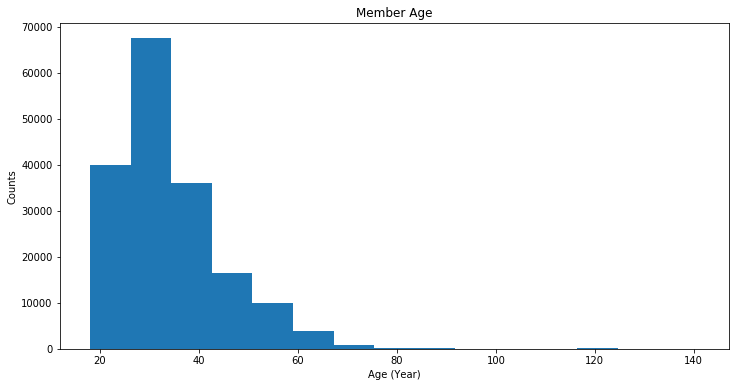

In [33]:
#plotting a histogram to check the count for a particular age 
plt.figure(figsize=(12,6))
plt.hist(bike_df['age'],bins = 15);

plot_labels('Age (Year)', 'Counts', 'Member Age')

The above histogram shows that the age of most members is between 20-40.

Increasing the number of bins to get a more clear picture of the Age distribution

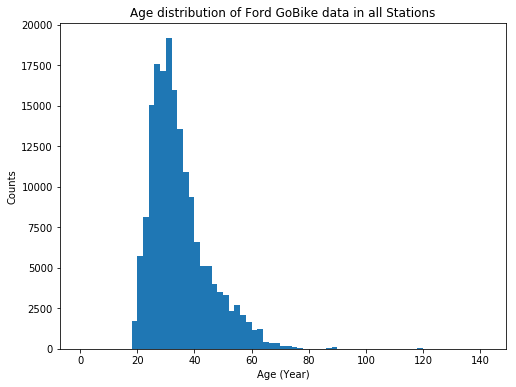

In [44]:
plt.figure(figsize=(8,6))
bins = np.arange(0, bike_df['age'].max()+2, 2)
plt.hist(data=bike_df, x='age', bins=bins)

plot_labels('Age (Year)', 'Counts', 'Age distribution of Ford GoBike data in all Stations')

The distribution above shows a long tail, so let's put it on a log scale instead and see how the tail looks like.

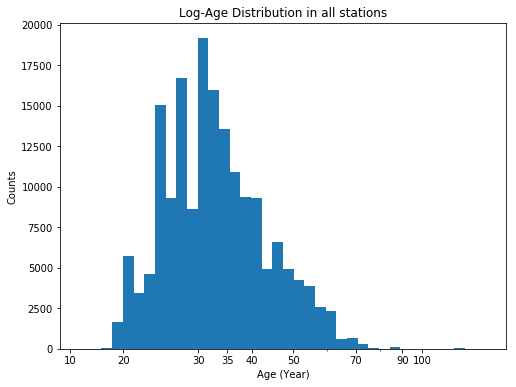

In [45]:
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(bike_df['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = bike_df, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([15,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])

plot_labels('Age (Year)', 'Counts', 'Log-Age Distribution in all stations')

In [39]:
bike_df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

The above distributions show the average age is between 30 to 34, with a minimum age of 18 and a maximum of 141

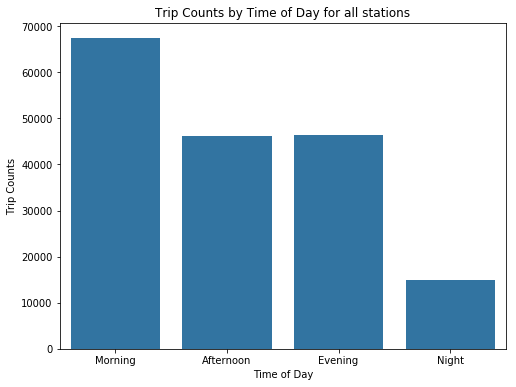

In [45]:
fig, ax = plt.subplots(nrows=1, figsize = [8,6])
#order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
order_time = ['Morning', 'Afternoon', 'Evening', 'Night']
sb.countplot(data = bike_df, x = 'time_of_day', color = default_color, order = order_time)
plot_labels('Time of Day', 'Trip Counts', 'Trip Counts by Time of Day for all stations')

The bar graph above shows that most trips are taken in the morning, and then spread evenly in the afternoon and evening, with way less trips occuring at night.

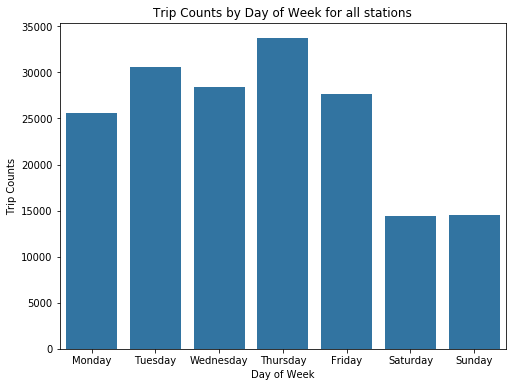

In [44]:
fig, ax = plt.subplots(nrows=1, figsize = [8,6])
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sb.countplot(data = bike_df, x = 'day', color = default_color, order = order_day)

plot_labels('Day of Week', 'Trip Counts', 'Trip Counts by Day of Week for all stations')

The bar graph above shows the number of trips occurring during the week are higher compared to the weekend

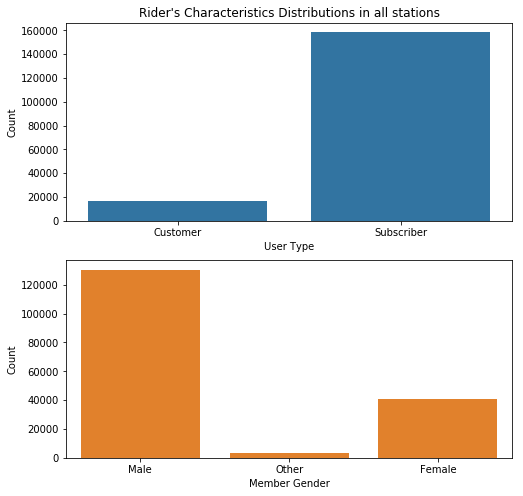

In [48]:
# 3. Rider's characteristics: the distributions of user type and gender
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()
sb.countplot(data = bike_df, x = 'user_type', color = default_color[0], ax = ax[0])
sb.countplot(data = bike_df, x = 'member_gender', color = default_color[1], ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('Rider\'s Characteristics Distributions in all stations');

The graphs above show the spread of user type and gender. 
- There are more Subscribers than Customer users
- There are more Male users than Female users

In [71]:
#A function to create a Pie Chart given these parameters: x-value, labels, and title
def plot_pie_chart(x, label, title):
    plt.figure(figsize=(8,8))
    gender_counts = bike_df[x].value_counts()

    plt.pie(gender_counts, labels = label, startangle = 90, counterclock = False, autopct='%.0f%%');
    plt.title(title);

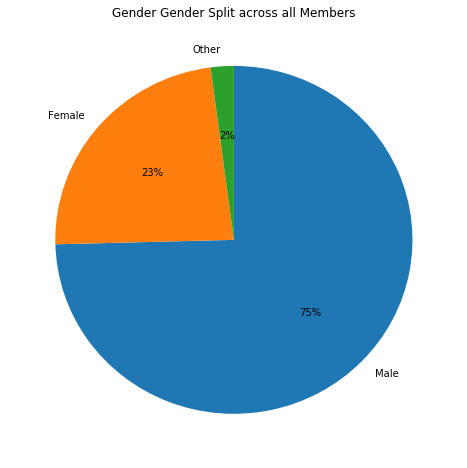

In [72]:
# plotting a pie for gender of all user types
x = 'member_gender'
label = ['Male','Female','Other']
title = 'Gender Gender Split across all Members'
plot_pie_chart(x, label, title)

The gender for all user types is made up of 75% males, 23% females, and 2% not indentified

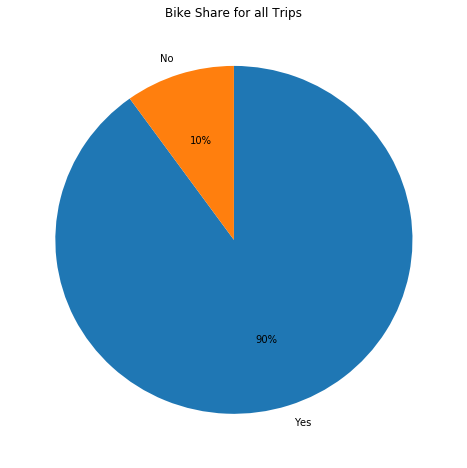

In [73]:
# plotting a pie of bike shares during trps
x = 'bike_share_for_all_trip'
label = ['Yes', 'No']
title = 'Bike Share for all Trips'
plot_pie_chart(x, label, title)

The pie chart above shows that 90% of the trips were shared, and 10% were not shared.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The dataset contains many males than females.
- There are more subscribers compared to customers
- The duration in secs of the trips are most of them in between 200 to 1000...meaning that most trip are less then 15 minutes! Which makes a lot of sense because this service works with single rides (up to 30 minutes)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The distribution of duration was surprising, 96 percent of trips were 30 mintes or less. There were some outliers that we removed.
- The Age has also some outliers that we removed.
- We created new features out of the time variable - split by day, hour, and time of day

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

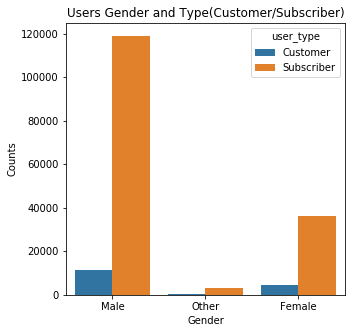

In [49]:
plt.figure(figsize = [5, 5]);

sb.countplot(data = bike_df, x = 'member_gender', hue = 'user_type');

plot_labels('Gender', 'Counts', 'Users Gender and Type(Customer/Subscriber)')

- The above graph shows the user type split by gender. Subscribers are greater than Customers, with more males across both subscribers

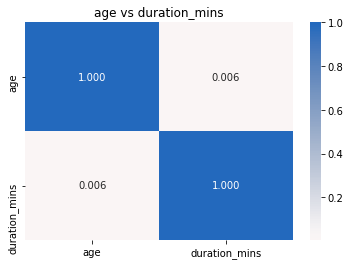

In [44]:
# first we get the relation between numeric variables like age and duration in seconds
numeric_vars = ['age', 'duration_mins']
sb.heatmap(bike_df[numeric_vars].corr(), annot=True, fmt='.3f', cmap = 'vlag_r', center = 0)
plt.title("age vs duration_mins");

The heatmap above shows a negative correlation between age and trip duration. This makes sense, as the higher the age, the lesser the trip duration.

Plotting a line chart to find peak times 

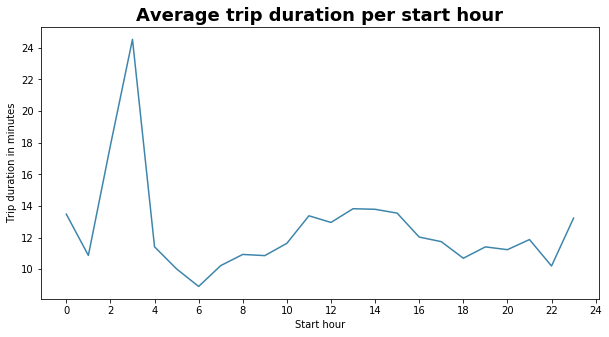

In [45]:
bike_df.groupby('start_hour')['duration_mins'].mean().plot(kind='line', figsize=(10,5) ,color='#3d85ab')
plt.title('Average trip duration per start hour' , fontsize=18 , fontweight='bold')
plt.ylabel('Trip duration in minutes')
plt.xlabel('Start hour')
plt.xticks([x for x in range(0,25, 2)])
plt.yticks(rotation=360);
plt.savefig('vis9.png',dpi=80, bbox_inches = "tight")
plt.show()

The line chart shows a peak between 1-4 with a trip duration of around 25 minutes. There is another peak between 9 and 18 with a duration of around 14 minutes

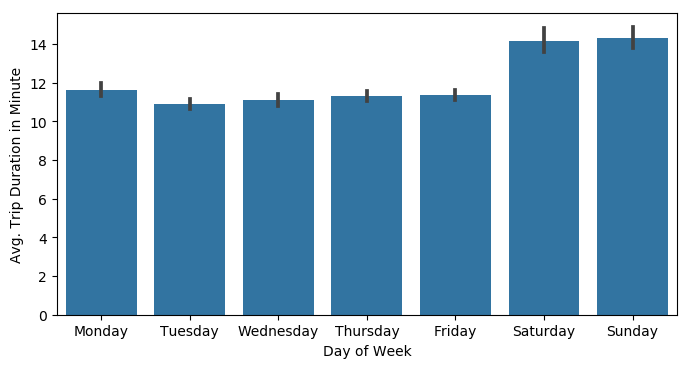

In [78]:
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = bike_df, x = "day", y = "duration_mins", color = default_color , order = order_day)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')

plt.show()

Throughout the week the average trip duration is around 11 minutes, with Saturday and Sunday having a higher duration average of around 15 minutes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is a peak between 1-4 with a trip duration of around 25 minutes. There is another peak between 9 and 18 with a duration of around 14 minutes
- Duration seems to be decreasing as the age gets higher.
- Subscribers have the most trips and time compared to Customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The analysis would have been more interesting if the data had more months
- The distributions appear to be normal, with no significant anormalies

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

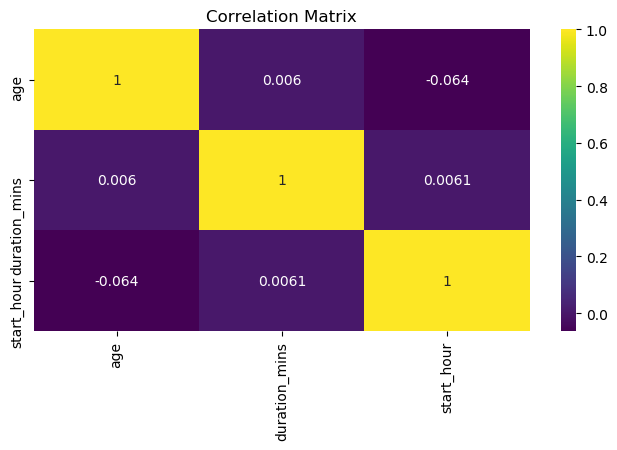

In [56]:
plt.figure(figsize = (8,4), dpi = 100)
vals = ['age', 'duration_mins', 'start_hour']
sb.heatmap(bike_df[vals].corr(), cmap = "viridis", annot = True)
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

As proven before, age appears to have a negative correlation with duration

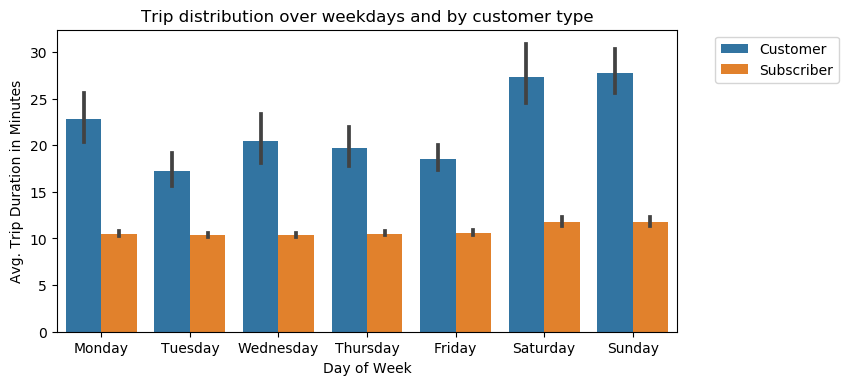

In [51]:
#bar plot for user type by avg duration
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = bike_df, x = "day", y = "duration_mins", hue='user_type', order = order_day)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plot_labels('Day of Week', 'Avg. Trip Duration in Minutes', 'Trip distribution over weekdays and by customer type')
plt.show()

- Subscriber trip duration is consistent throughout the week, with a small increase over the weekend with an average of around 10-12 minutes
- Customers trip duration is much higher than that of Customers, with an average between 25-30 minutes over the weekend

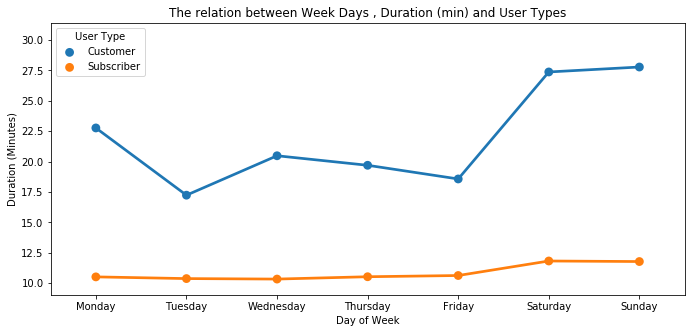

In [74]:
#Line chart to check relationship between weekdays, duration, and user types
plt.figure(figsize=[25, 5])
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
plt.subplot(1, 2, 1)
sb.pointplot(data=bike_df, x='day', y='duration_mins', hue='user_type', errwidth=0, order=order)
plot_labels('Day of Week', 'Duration (Minutes)', 'The relation between Week Days , Duration (min) and User Types')
plt.legend(title='User Type');

Customers have a higher trip duration average than Subscribers, especially during the weekend.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration confirmed the following:
- Age has a negative correlation with trip duration. This proves that the older the user, the less time spent on trip
- Most users are male, making 75% of all users.
- Higher average trip durations occur over the weekend
- Customers seem to have higher trip durations compared to Subscribers

### Were there any interesting or surprising interactions between features?

- I expected Subscribers to have the highest trip durations throughout the week
- Data for other months of the year would help to investigate further and derive a lot of answers.

## Conclusions
- The raw data took alot of time to explore and wrangle. However, that helped to developing questions and picking the right columns to to answer them
- Between Customer and Subscribers, the following findings were quite interesting:
    - Customers have the highest trip duration, but Subscribers are more consistent with bike trips throughout the week.
    - There is usually an increase of customers over the weekend compared to weekdays
    - Age seems to be a determining factor for trip duration. The younger you are, the higher the trip duration
    
It would have been far more interesting if the data had more months, and more details about the users - reason for bike ride
